In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_iris
import matplotlib as mpl

In [2]:
# 指定显示字体，防止中文乱码
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['savefig.dpi'] = 1000  # 保存的图片像素

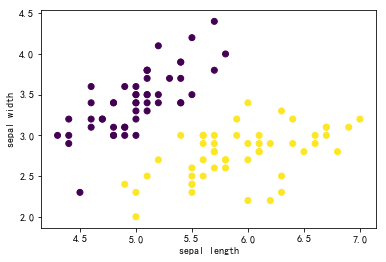

In [53]:
def getdata():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = ['sepal length', 'sepal width',
                  'petal length', 'petal width', 'label']
#     print(df.label.value_counts())
#     print(df)
#     print(df[df['label'] == 0].count())
#     print(df[df['label'] == 1].count())
#     print(df[df['label'] == 2].count())
#     print((df['label'] == 0).count())
    x = np.zeros(((100,2)))
    x[:,0] = df[0:100]['sepal length']
    x[:,1] = df[0:100]['sepal width']
    y = np.zeros((100,1))
    y = df[0:100]['label']
    plt.figure(0)
    plt.scatter(x[:,0], x[:,1], c=y)
#     plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')
#     plt.legend()
    plt.show()
    
    return x,y

x, y = getdata()

### sklearn.linear_model.Percepron

In [90]:
model = Perceptron(fit_intercept=True, max_iter=10000, shuffle=True, tol=1e-5)
model.fit(x,y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=10000, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=1e-05,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [91]:
print('x.shape:', x.shape)
print(model.coef_)
print(model.coef_.shape)

x.shape: (100, 2)
[[ 31.3 -50.1]]
(1, 2)


In [92]:
print(model.intercept_.reshape(1,-1))
print(model.intercept_.shape)

[[-9.]]
(1,)


In [93]:
w = model.coef_
b = model.intercept_
x1_draw = np.linspace(min(x[:, 0])-0.1, max(x[:, 0])+0.1, 10).reshape(-1,1)
x2_draw = -(w[0,0]*x1_draw + b)/w[0,1]
print('w.shape:{}\nb.shape:{}\nx1.shape:{}\nx2.shape:{}'.format(w.shape, b.shape, x1_draw.shape, x2_draw.shape))

w.shape:(1, 2)
b.shape:(1,)
x1.shape:(10, 1)
x2.shape:(10, 1)


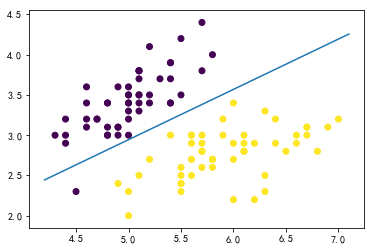

In [94]:
plt.plot(x1_draw, x2_draw)
plt.scatter(x[:,0], x[:,1], c=y)

In [80]:
max(x[:, 0])

7.0

In [95]:
x[50,:]

array([7. , 3.2])